<a href="https://colab.research.google.com/github/Himanshu-Dharma/Elon_bots_sentiment_analysis/blob/Him/Twitter_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fetch the Json

In [ ]:
import json
  
f = open('/content/tweets_ws22_v1.json')
data = json.load(f)

print("Number of Tweets:" , len(data))

Number of Tweets: 16949


In [ ]:
# show tweet
tweetID = 0

print("Tweet", data[tweetID]["text"])
print("Component:", data[tweetID]["labels"]["topic"][0]['topic'])
print("Sentiment:", data[tweetID]["labels"]["sentiment"][0]['sentiment'])

f.close()

Tweet @DSisourath The Thameslink core between London St Pancras and London Blackfriars in rush hours onlybut the in cab rubbish rarely works
Component: service
Sentiment: negative


## Json -> Dataframe

In [ ]:
import pandas as pd

df = pd.DataFrame(data)

In [ ]:
df.head(2)

,source_created_at,author_id,text,source,language,longitude,latitude,id,labels,source_id
0,2020-09-18 21:56:20.798000,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,{'topic': [{'tweet_id': 'acd7673f-e621-5f1a-d6...,NaN
1,2020-10-13 07:31:53.122000,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,{'topic': [{'tweet_id': '5b92aba8-4b05-6c63-84...,NaN


In [ ]:
df["labels"].iloc[0]['topic'][0]['tweet_id']

'acd7673f-e621-5f1a-d662-df278964a6ea'

In [ ]:
df.describe()

,longitude,latitude
count,1425.000000,1425.000000
mean,-0.600207,50.943704
std,4.618717,7.953581
min,-79.416300,-16.925528
25%,-0.703120,51.508530
50%,-0.125740,51.508530
75%,-0.125740,52.160450
max,145.771469,56.000000


## Normalize the nested json label column

In [ ]:
new_pd = pd.json_normalize(data, max_level=1)


In [ ]:
new_pd.head(2)

,source_created_at,author_id,text,source,language,longitude,latitude,id,labels.topic,labels.sentiment,source_id
0,2020-09-18 21:56:20.798000,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,[{'tweet_id': 'acd7673f-e621-5f1a-d662-df27896...,[{'tweet_id': 'acd7673f-e621-5f1a-d662-df27896...,NaN
1,2020-10-13 07:31:53.122000,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,[{'tweet_id': '5b92aba8-4b05-6c63-8485-e9c8707...,[{'tweet_id': '5b92aba8-4b05-6c63-8485-e9c8707...,NaN


## percentage missing values

In [ ]:
#Percentage of missing values
def msng_prnct(df):
  percent_missing = df.isnull().sum() * 100 / len(df)
  missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
  return missing_value_df
#We might have to omit geography as most of the tweets dont have information there

In [ ]:
new_df = msng_prnct(new_pd)

In [ ]:
new_pd["labels.sentiment"].iloc[0][0]['sentiment']

'negative'

In [ ]:
newpd1 = pd.DataFrame.from_dict(new_pd["labels.topic"])

In [ ]:
newpd1.head(2)

,labels.topic
0,[{'tweet_id': 'acd7673f-e621-5f1a-d662-df27896...
1,[{'tweet_id': '5b92aba8-4b05-6c63-8485-e9c8707...


In [ ]:
# restructure data with having results as well directly 
# datetime into time of the day with negatives and positives
# sarcasm looks like it is handled 
# 

## Flatten Labels coulmn

In [ ]:
new_pd.head(1)

,source_created_at,author_id,text,source,language,longitude,latitude,id,labels.topic,labels.sentiment,source_id
0,2020-09-18 21:56:20.798000,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,[{'tweet_id': 'acd7673f-e621-5f1a-d662-df27896...,[{'tweet_id': 'acd7673f-e621-5f1a-d662-df27896...,NaN


In [ ]:
topic = pd.DataFrame.from_dict(dict(new_pd["labels.topic"]),orient='index')
df1 = pd.DataFrame([x for x in topic[0]])
df1.head()

,tweet_id,user_id,relevant,topic,ground_truth,id
0,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,True,service,True,8655353b-cc71-1e89-95d5-1c4e6bf200e1
1,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,True,delays,True,8aee5c86-6e93-24d4-6d9d-d8a9f2f19cef
2,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,True,toilets,True,2d54f18a-442d-b59b-9daf-0490dc64d21a
3,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,True,toilets,True,01db4b72-b21c-60f9-b627-5a47df56655a
4,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,True,seats,True,4fe5177f-8347-1726-c2e9-cc183f16d5b1


In [ ]:
sentiment = pd.DataFrame.from_dict(dict(new_pd["labels.sentiment"]),orient='index')
df2 = pd.DataFrame([x for x in sentiment[0]])
df2.head()

,tweet_id,user_id,sentiment,ground_truth,id
0,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,negative,True,5ee4d218-65a9-70a0-0964-a5b00e594a41
1,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,negative,True,2f8d741f-59cf-d1ab-27f9-5537a9718f94
2,0a799c07-8b76-17ba-b840-e538d51e832d,Z003XDCS,negative,True,be479c30-17c3-220f-8eae-eaf6fc874431
3,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,Z003XDCS,negative,True,6df4ba5c-952f-732f-2a7e-4cc6f7d56f61
4,1fd08862-d8c7-0682-6b11-2603fba22d94,Z003XDCS,neutral,True,e5aa618a-c554-6bdb-cb5b-bcdadcaa4e98


In [ ]:
flatten_df

NameError: ignored

In [ ]:
flatten_df = pd.merge(new_pd, pd.merge(df1, df2, left_index=True, right_index=True), left_index=True, right_index=True)
flatten_df = flatten_df.drop(columns=['labels.topic', 'labels.sentiment'], axis=1)
flatten_df['source_created_at'] = pd.to_datetime(flatten_df['source_created_at'])


In [ ]:
flatten_df.head(2)

,source_created_at,author_id,text,source,language,longitude,latitude,id,source_id,tweet_id_x,user_id_x,relevant,topic,ground_truth_x,id_x,tweet_id_y,user_id_y,sentiment,ground_truth_y,id_y
0,2020-09-18 21:56:20.798,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,NaN,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,True,service,True,8655353b-cc71-1e89-95d5-1c4e6bf200e1,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,negative,True,5ee4d218-65a9-70a0-0964-a5b00e594a41
1,2020-10-13 07:31:53.122,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,NaN,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,True,delays,True,8aee5c86-6e93-24d4-6d9d-d8a9f2f19cef,5b92aba8-4b05-6c63-8485-e9c870742137,Z003XDCS,negative,True,2f8d741f-59cf-d1ab-27f9-5537a9718f94


In [ ]:
flatten_df = flatten_df.drop(columns=['user_id_x', 'ground_truth_x', 'tweet_id_x'], axis=1)

In [ ]:
flatten_df = flatten_df.rename(columns={"user_id_y": "user_id", "ground_truth_y": "ground_truth", "tweet_id_y	":"tweet_id"})

In [ ]:
flatten_df.head(1)

,source_created_at,author_id,text,source,language,longitude,latitude,id,source_id,relevant,topic,id_x,tweet_id_y,user_id,sentiment,ground_truth,id_y
0,2020-09-18 21:56:20.798,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,NaN,True,service,8655353b-cc71-1e89-95d5-1c4e6bf200e1,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,negative,True,5ee4d218-65a9-70a0-0964-a5b00e594a41


## plotting the column as histogram 


- section incomplete, not needed

NameError: ignored

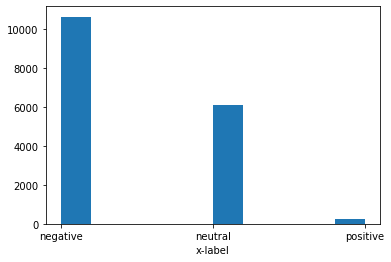

In [ ]:
import matplotlib.pyplot as plt

plt.hist(flatten_df['sentiment'], bins=10)
plt.xlabel('x-label')
ax.set_ylabel('y-label')

In [ ]:
flatten_df['sentiment'].value_counts()

negative    10628
neutral      6079
positive      242
Name: sentiment, dtype: int64

In [ ]:
flatten_df.plot()

In [ ]:
fig, ax = hist.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(flatten_df.sentiment.values,
           flatten_df['sentiment'],
           color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Hourly Precipitation - Boulder Station\n 2003-2013")

plt.show()

NameError: ignored

## datetime

In [ ]:
flatten_df.head(1)

,source_created_at,author_id,text,source,language,longitude,latitude,id,source_id,relevant,topic,id_x,tweet_id_y,user_id,sentiment,ground_truth,id_y
0,2020-09-18 21:56:20.798,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,NaN,True,service,8655353b-cc71-1e89-95d5-1c4e6bf200e1,acd7673f-e621-5f1a-d662-df278964a6ea,Z003XDCS,negative,True,5ee4d218-65a9-70a0-0964-a5b00e594a41


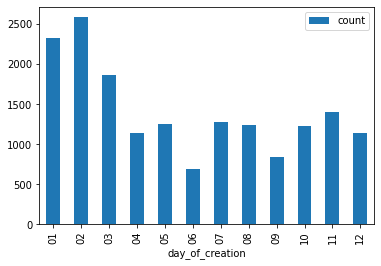

In [ ]:
# convert column to datetime
flatten_df['source_created_at'] = pd.to_datetime(flatten_df['source_created_at'])

# create a representation of the day with strfmt
flatten_df['day_of_creation'] = flatten_df['source_created_at'].map(lambda dt: dt.strftime('%m'))

grouped_df = flatten_df.groupby('day_of_creation').size().to_frame("count").reset_index()

grouped_df.plot(kind='bar', x='day_of_creation', y='count')

In [ ]:
flatten_df.to_csv("output.csv")

In [ ]:
import datetime
import calendar
flatten_df['weekdayn'] = flatten_df['source_created_at'].dt.dayofweek
flatten_df['weekday'] = flatten_df['source_created_at'].dt.day_name()
flatten_df['hour'] = flatten_df['source_created_at'].dt.hour
flatten_df['month'] = flatten_df['source_created_at'].dt.month
flatten_df['monthname'] = flatten_df['source_created_at'].dt.month_name()
flatten_df['year'] = flatten_df['source_created_at'].dt.year
flatten_df['time'] = flatten_df['source_created_at'].dt.strftime("%H:%M:%S")
flatten_df['date'] = flatten_df['source_created_at'].dt.date
flatten_df.head()

,source_created_at,author_id,text,source,language,longitude,latitude,id,source_id,relevant,...,id_y,day_of_creation,weekdayn,weekday,hour,month,monthname,year,time,date
0,2020-09-18 21:56:20.798,593731316,@DSisourath The Thameslink core between London...,sprinklr,en,-0.12574,51.50853,acd7673f-e621-5f1a-d662-df278964a6ea,NaN,True,...,5ee4d218-65a9-70a0-0964-a5b00e594a41,09,4,Friday,21,9,September,2020,21:56:20,2020-09-18
1,2020-10-13 07:31:53.122,745583289520496640,@DulwichHistory Loving the complaint about peo...,sprinklr,en,-0.12574,51.50853,5b92aba8-4b05-6c63-8485-e9c870742137,NaN,True,...,2f8d741f-59cf-d1ab-27f9-5537a9718f94,10,1,Tuesday,7,10,October,2020,07:31:53,2020-10-13
2,2020-10-26 19:27:24.695,303134761,@SW_Help .And yet you have no toilets on some ...,sprinklr,en,-0.12574,51.50853,0a799c07-8b76-17ba-b840-e538d51e832d,NaN,True,...,be479c30-17c3-220f-8eae-eaf6fc874431,10,0,Monday,19,10,October,2020,19:27:24,2020-10-26
3,2020-10-26 19:28:49.281,303134761,@SW_Help you have no toilets on some of your t...,sprinklr,en,-0.12574,51.50853,8b4d2a34-c4f0-0e19-4055-dfe4af5f0e14,NaN,True,...,6df4ba5c-952f-732f-2a7e-4cc6f7d56f61,10,0,Monday,19,10,October,2020,19:28:49,2020-10-26
4,2020-09-28 11:59:41.212,56427671,@SpeedySticks007 @MrNeilJH @TLRailUK @christia...,sprinklr,en,-1.09125,50.79899,1fd08862-d8c7-0682-6b11-2603fba22d94,NaN,True,...,e5aa618a-c554-6bdb-cb5b-bcdadcaa4e98,09,0,Monday,11,9,September,2020,11:59:41,2020-09-28


In [ ]:
flatten_df.head(1)

In [ ]:
#General correlation

flatten_df.corr(method='pearson')

,longitude,latitude,relevant,ground_truth,weekdayn,hour,month,year
longitude,1.000000,-0.185765,NaN,NaN,-0.004557,0.036861,0.098804,-0.226123
latitude,-0.185765,1.000000,NaN,NaN,-0.085628,-0.009735,0.152754,0.051347
relevant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ground_truth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekdayn,-0.004557,-0.085628,NaN,NaN,1.000000,0.010069,-0.023489,0.007718
hour,0.036861,-0.009735,NaN,NaN,0.010069,1.000000,0.046050,-0.050043
month,0.098804,0.152754,NaN,NaN,-0.023489,0.046050,1.000000,-0.333598
year,-0.226123,0.051347,NaN,NaN,0.007718,-0.050043,-0.333598,1.000000


## Keywords

In [ ]:
#Getting keywords 


keywords = ["#thameslink","#TLUpdates","@gtrailuk", "@TLRailUK","Govia Thameslink Railway", "Govia Thameslink",
"GTR thameslink", "thameslink", "TLRailUK"]

In [ ]:
#Getting count of keywords in a list

count = []

for key in keywords:
  sum = tweet_df.str.contains(key).sum()
  count.append(sum)
print(count)

[257, 1120, 0, 11129, 89, 283, 0, 706, 11165]


In [ ]:
count

[257, 1120, 0, 11129, 89, 283, 0, 706, 11165]

# Twitter API

In [1]:
import tweepy
import pandas as pd

api_key= "cWPT6n7u5cHJPPU1aRiEZeK20"
api_secret_key="z8jGCinWU2mFtwOiyUuIbHod7LAKTOvvNFoMSYGz9qeqS6auhx"
access_token="708596893526306816-VoVFaUMWDG96DZORRRkhUoQ9K8xxjii"
access_token_secret="HfBpMj72GW43WrECb2cFs1Tt6ndmxzWl2TNKLLlBgTM3N"

auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

## Get tweets as per user id

In [ ]:
user = 'veritasium'
limit = 300


tweets = tweepy.Cursor(api.user_timeline, tweet_fields=['created_at'], screen_name=user, count=10, tweet_mode='extended',).items(limit) # <--- tweepy.Cursor is used to bypass the api's returning limit of 200 tweets 
#tweets = api.user_timeline(screen_name=user, count=limit, tweet_mode='extended') 
#api will truncate the tweets and we will only get 140 characters from each tweet, if the tweet mode is not set to truncated

#Dataframe 
columns = ['time','User', 'Tweets']
data = []


for tweet in tweets:
  data.append([tweet.created_at, tweet.user.screen_name, tweet.full_text])

df = pd.DataFrame(data, columns=columns)
print(df)

## Get tweets as per keywords

In [14]:
start_date = input('please enter date')

please enter date2022-11-25


In [3]:
end_date = input('please enter date')

please enter date2022-11-28


In [33]:
keywords = ["#thameslink","#TLUpdates","@gtrailuk", "@TLRailUK","Govia Thameslink Railway", "Govia Thameslink",
"GTR thameslink", "thameslink", "TLRailUK"]
limit = 10

for word in keywords:
  tweets = tweepy.Cursor(api.search, q=word,  tweet_fields=['created_at'], since=start_date, until=end_date,
                         count=500, tweet_mode='extended').items(limit) 
  #tweepy.Cursor is used to bypass the api's returning limit of 200 tweets 
  #api will truncate the tweets and we will only get 140 characters from each tweet, if the tweet mode is not set to truncated

#Dataframe 
columns = ['time', 'User', 'Tweets']
data = []


for tweet in tweets:
  data.append([tweet.created_at, tweet.user.screen_name, tweet.full_text,])

df_keywrods = pd.DataFrame(data, columns=columns)
print(df_keywrods)

                 time             User  \
0 2022-11-27 23:54:29         TLRailUK   
1 2022-11-27 23:42:01         TLRailUK   
2 2022-11-27 23:38:22       graham_hst   
3 2022-11-27 22:55:43    _KanezakaKiri   
4 2022-11-27 22:08:36     Matt84065701   
5 2022-11-27 21:08:35  TrainDriver2017   
6 2022-11-27 20:56:35         TLRailUK   
7 2022-11-27 20:54:33   EastMidRailway   
8 2022-11-27 20:54:29         TLRailUK   
9 2022-11-27 20:52:11       kg_mini_me   

                                              Tweets  
0  📢 All services are at a stand in the Purley ar...  
1  ⚠️ Due to trespassers on the railway, services...  
2  RT @NamiHusky: More from Peterborough:\n\n@TLR...  
3  @TrainDriver2017 @TLRailUK Quality could of at...  
4  @TLRailUK the worst train company ever!! Not o...  
5  @_KanezakaKiri @TLRailUK Yeah that’s not happe...  
6  @kg_mini_me @EastMidRailway Hi. There's engine...  
7  @kg_mini_me @TLRailUK Hi, there is a strike on...  
8  ✅ Disruption due to an earlier trespass

In [ ]:
df_keywrods.head(3)

In [29]:
df_keywrods['User'][1]

'TLRailUK'

In [45]:
id_data = []
column = ['userid']

for i in range(len(df_keywrods['User'])):
  user_id = api.get_user(screen_name = df_keywrods['User'][i])
  #ID = user_id.id_str
  #id_data.append([ID])

for ids in id_data:
  id_data.append([user_id.id_str])

df_ida= pd.DataFrame(id_data, columns=column)
print(df_ida)

Empty DataFrame
Columns: [userid]
Index: []


In [46]:
df_ida

,userid


In [5]:
df_keywrods.to_csv(f'{start_date}_to_{start_date}_tweets_output.csv', index=False)

In [37]:
df_keywrods['userid'] = id_data

In [40]:
df_keywrods.head(5)

,time,User,Tweets,userid
0,2022-11-27 23:54:29,TLRailUK,📢 All services are at a stand in the Purley ar...,[2589703207]
1,2022-11-27 23:42:01,TLRailUK,"⚠️ Due to trespassers on the railway, services...",[2589703207]
2,2022-11-27 23:38:22,graham_hst,RT @NamiHusky: More from Peterborough:\n\n@TLR...,[1521848640880488451]
3,2022-11-27 22:55:43,_KanezakaKiri,@TrainDriver2017 @TLRailUK Quality could of at...,[1569839276996829184]
4,2022-11-27 22:08:36,Matt84065701,@TLRailUK the worst train company ever!! Not o...,[1537474046400647169]
